# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Carrie Chan

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

X_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)

tree = DecisionTreeRegressor(max_depth = 5, random_state = 0)
forest = RandomForestRegressor(max_depth = 5, random_state = 0)
gbt = GradientBoostingRegressor(max_depth = 5, random_state = 0)

results = pd.DataFrame(columns = ['Training accuracy', 'Validation Accuracy'])

model = [tree, forest, gbt]

for i in range(3):
    model[i].fit(X_train, y_train)  # cross validate will fit model also 
    scores = cross_validate(model[i], X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
    results.loc[i] = [(-1)*scores['train_score'].mean(), (-1)*scores['test_score'].mean()]

results.index = ['DT', 'RF', 'GB']
print("MSE Results: ")
print(results)


MSE Results: 
    Training accuracy  Validation Accuracy
DT          47.279761            73.447331
RF          29.577455            45.059351
GB           3.379440            22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [4]:
# TO DO: ADD YOUR CODE HERE
results_R2 = pd.DataFrame(columns = ['Training accuracy', 'Validation Accuracy'])

for i in range(3):
    model[i].fit(X_train, y_train)
    scores = cross_validate(model[i], X_train, y_train, cv = 5, scoring = 'r2', return_train_score = True)
    results_R2.loc[i] = [scores['train_score'].mean(), scores['test_score'].mean()]

results_R2.index = ['DT', 'RF', 'GB']
print("R2 Score Results: ")
print(results_R2)

R2 Score Results: 
    Training accuracy  Validation Accuracy
DT           0.834465             0.738697
RF           0.896557             0.840927
GB           0.988171             0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. The non-linear models gave better results for both MSE and R2 scores than the linear model. In assignment 2, the Linear Regression model had training and validation accuracies of 111.358439 and 95.904136 for MSE respectively, and 0.610823 and 0.623414 for R2 respectively. The non-linear models produced results that had higher values in both training and accuracy scores, with the lowest scores being 0.834465 (training) and 0.738697 (validation) for Decision Trees and the highest scores being 0.988171 (training) and 0.919471 (validation) for the Gradient Boosting model. The non-linear models also produced better results for MSE scores since they were closer to zero. The worst MSE accuracy scores in the non-linear models were 47.279761 (training) and 73.447331 (validation) for the Decision Tree model, which are still lower than the MSE scores for the Linear Regression model. 
2. Out of all the models that were tested, I would select the gradient boosting model for this dataset. This is because it gave the highest R2 validation accuracy score, at 0.919471, and the lowest MSE scores for training and validation accuracy, at 3.379440 and 22.783221 respectively. The closer the MSE score is to zero (zero would mean the model is perfect), the better.
3. To improve the accuracy of the tree-based models, the max depth needs to be optimized. While increasing the max depth may increase accuracy, it may also introduce more variance between the training and validation accuracies and overfit the model. Therefore, the max depth may need to be adjusted (increase or decrease) accordingly to the dataset. Optimizing the learning rate (learning_rate parameter) of the Gradient Boosting model, and setting an optimal number of trees (n_estimator parameter) for the Random Forest model may also increase the accuracy of these models.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?


*DESCRIBE YOUR PROCESS HERE*

1. The code was sourced from lecture code examples. 
2. The steps were completed in chronological order.
3. Generative AI was not used for part 1.
4. I did not have any challenges in coding this portion as the lecture code examples provided a good guideline to this problem. The sklearn documentation for cross_validate (found at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) was also used to understand the parameters and returns of this function. The workflow process for part 1 was very similar to assignment 2 (linear models), which was referred to as well.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [5]:
# TO DO: Import wine dataset

wine = pd.read_csv('wine/wine.data', sep = ',', header = None)
wine.columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X = wine.iloc[:, 1:14]  # use all rows and all columns except for class column
y = wine['class']  # class is the target vector as specified in the dataset information

print("The size of X is: ", X.shape, ",and the type is: ", type(X))
print("The size of y is: ", y.shape, ",and the type is: ", type(y))

The size of X is:  (178, 13) ,and the type is:  <class 'pandas.core.frame.DataFrame'>
The size of y is:  (178,) ,and the type is:  <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [6]:
# TO DO: ADD YOUR CODE HERE
wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [7]:
# TO DO: ADD YOUR CODE HERE
print(wine.isnull().sum())
print("\nMissing values in dataset:", wine.isnull().sum().sum())

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Missing values in dataset: 0


How many samples do we have of each type of wine?

In [8]:
# TO DO: ADD YOUR CODE HERE 
y.value_counts()

# Class 1 has 59 samples, Class 2 has 71 samples, and Class 3 has 48 samples

class
2    71
1    59
3    48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [9]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

svc = SVC()
tree_c = DecisionTreeClassifier(max_depth = 3, random_state = 0)
model = [svc, tree_c]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

results = pd.DataFrame(columns = ['Data Size', 'Training accuracy', 'Validation Accuracy'])

for i in range(2):
    model[i].fit(X_train, y_train)  # cross_validate will fit model also
    scores = cross_validate(model[i], X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)
    results.loc[i] = [X.shape, scores['train_score'].mean(), scores['test_score'].mean()]
    
results.index = ['SVC', 'Tree Classifier']
print(results)

                 Data Size  Training accuracy  Validation Accuracy
SVC              (178, 13)           0.710439             0.683761
Tree Classifier  (178, 13)           0.973691             0.872650


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [10]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix

y_pred = tree_c.predict(X_test)

mat = confusion_matrix(y_test, y_pred, labels = [1, 2, 3])

Text(170.97222222222223, 0.5, 'true value')

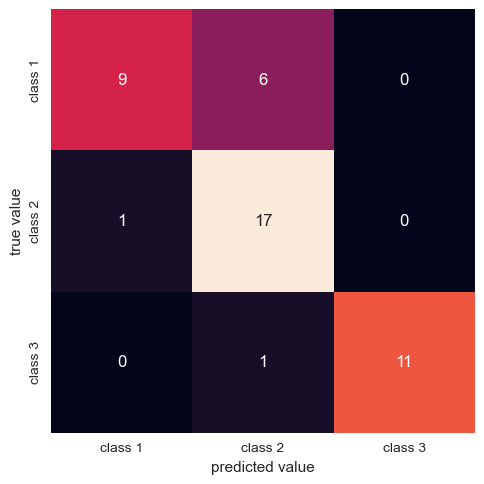

In [11]:
# TO DO: Print confusion matrix using a heatmap
sns.heatmap(mat, xticklabels=['class 1', 'class 2', 'class 3'], yticklabels=['class 1', 'class 2', 'class 3'], square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [12]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.60      0.72        15
           2       0.71      0.94      0.81        18
           3       1.00      0.92      0.96        12

    accuracy                           0.82        45
   macro avg       0.87      0.82      0.83        45
weighted avg       0.85      0.82      0.82        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
2. What are two reasons why the support vector machines model did not work as well as the tree-based model?
3. How many samples were incorrectly classified in step 5.2? 
4. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. The training and validation accuracies increased when using the Decision Tree Classifier model in comparison to the accuracies obtained from using the SVC model. The training and validation accuracies for the tree model were 0.973691 and 0.872650 respectively, whereas the SVC training and validation accuracies were 0.710439 and 0.683761 respectively. 
2. The SVM model did not work as well as the tree-based model since this example has an imbalanced dataset, which SVM performs poorly with since the results in the hyperplane become skewed towards the minority class (source: https://towardsdatascience.com/when-do-support-vector-machines-fail-3f23295ebef2). Furthermore, SVM requires tuning of the parameters (e.g.  regularization parameter C and gamma) and adjusting these parameters would affect the performance of the SVM model. The low accuracy score for this model may mean that the parameter values used were not optimal for this dataset.
3. 8 samples were incorrectly classified in step 5.2.
4. In this case, maximizing precision may be more important. As per the validation metrics lecture slides, precision calculates the number of samples that were predicted positive, were actually positive. For cases such as ensuring wine quality and certification purposes, it may be more important to ensure that the wine was placed in the correct class than it is to capture all the wine that belongs to that class (maximizing recall risks false positives).

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. Code was sourced from lecture code examples. Functions were also searched and found online, such as reading .data files (from: https://www.askpython.com/python/examples/read-data-files-in-python).
2. The steps were completed in chronological order.
3. Generative AI was used to search how to set new headers when importing the data. The prompt used was: "when using pd.read_csv, how do I set new headers?". I modified my code to include the parameter provided, which indicated that the dataset had no headers.
4. I had some challenges understanding maximizing recall vs. maximizing precision for datasets.

Websites used:
https://www.geeksforgeeks.org/support-vector-machine-in-machine-learning/

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

In part 1, the non-linear tree models produced better results than the linear regression model in assignment 2. The Linear Regression model had training and validation accuracies of 111.358439 and 95.904136 for MSE respectively, and 0.610823 and 0.623414 for R2 respectively. The best performing non-linear model was the Gradient Boosting model, with MSE training and validation accuracy scores of 3.379440        and 22.783221 respectively and R2 training and validation scores of 0.988171 and 0.919471 respectively. Gradient Boosting was the most optimal model out of all the ones that were used since it had the highest R2 validation accuracy score and the lowest MSE scores (a lower MSE score indicates a better fit). As stated in the lecture slides, this may be due to the non-linear tree models working well without scaling the data and can work well on a mixture of binary and continuous features (load_concrete() data has continuous features). As the model complexities increased, the accuracy increased, however the variance between the training and validation accuracies also increased. The Linear Regression model had high bias and low variance in comparison to the higher variance in the non-linear models. 

In part 2 of this assignment, the SVC produced worse training accuracy scores than the Tree Classifier model. SVC had scores of 0.710439 (training) and 0.683761 (validation), whereas Tree Classifier had scores of 0.973691 (training) and 0.872650 (validation). This may be due to SVM's need for preprocessing of the dataset and tuning of the model parameters (such as gamma and C), which were not done for this exercise. Tree-based models, on the other hand, require little or no preprocessing as mentioned in the SVM lecture slides.


## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked that this assignment allowed me to practice using non-linear models on datasets as this helped me have a better understanding on the topic. I found it confusing at first, when I had to download and import the wine dataset in part 2 as it was in a .data file. 

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [13]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(max_iter=5000, random_state=0)
linear_svc.fit(X_train, y_train)

score_lsvc = cross_validate(linear_svc, X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)
results_lsvc = pd.DataFrame(index = ['Linear SVC'], columns = ['Data Size', 'Training accuracy', 'Validation Accuracy'])
results_lsvc.loc['Linear SVC'] = [X.shape, scores['train_score'].mean(), scores['test_score'].mean()]
print(results_lsvc)

C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

            Data Size Training accuracy Validation Accuracy
Linear SVC  (178, 13)          0.973691             0.87265


C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\carri\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(170.97222222222223, 0.5, 'true value')

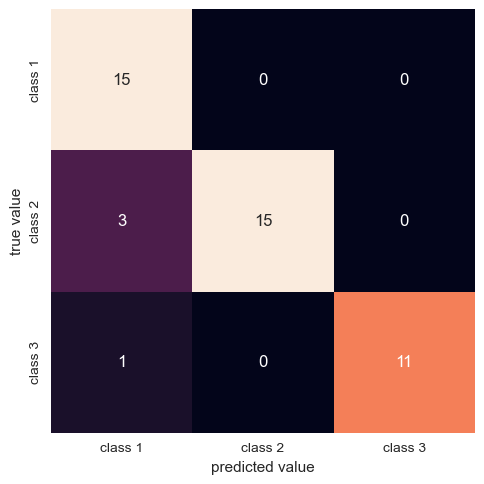

In [14]:
y_pred_lsvc = linear_svc.predict(X_test)
mat_lsvc = confusion_matrix(y_test, y_pred_lsvc, labels = [1, 2, 3])
sns.heatmap(mat_lsvc, xticklabels=['class 1', 'class 2', 'class 3'], yticklabels=['class 1', 'class 2', 'class 3'], square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [15]:
print(classification_report(y_test, y_pred_lsvc))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        15
           2       1.00      0.83      0.91        18
           3       1.00      0.92      0.96        12

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



*ANSWER HERE*

Linear SVC produced the same results in terms of training and accuracy scores as the Decision Tree Classifier model. The similar results may be due to the dataset being linearly separable. In comparison to the Decision Tree Classifier model, the Linear SVC model produced less classification errors. The model incorrectly classified 4 samples, instead of the 8 samples with the tree model and the precision report had higher f1-scores for every row. While Linear SVC may be a better fit than Decision Tree, it is not the most optimal model for this dataset since the validation accuracy is still relatively low ad there is high variance (relatively large difference between training and validation accuracy).